In [0]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
os.chdir("drive/msrda6")

In [0]:
os.chdir("../msrda8")

In [0]:
import cv2     # for capturing videos
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Read the videos, extract frames and save them as images


In [0]:
fnames = []
for a in range(15, 17):
    for s in range(1, 11):
        for e in range(1, 3):
            fnames.append('a' + "{:02d}".format(a) + '_s' + "{:02d}".format(s) +
                          '_e' + "{:02d}".format(e) + '_rgb.avi')
print(fnames)      

['a15_s01_e01_rgb.avi', 'a15_s01_e02_rgb.avi', 'a15_s02_e01_rgb.avi', 'a15_s02_e02_rgb.avi', 'a15_s03_e01_rgb.avi', 'a15_s03_e02_rgb.avi', 'a15_s04_e01_rgb.avi', 'a15_s04_e02_rgb.avi', 'a15_s05_e01_rgb.avi', 'a15_s05_e02_rgb.avi', 'a15_s06_e01_rgb.avi', 'a15_s06_e02_rgb.avi', 'a15_s07_e01_rgb.avi', 'a15_s07_e02_rgb.avi', 'a15_s08_e01_rgb.avi', 'a15_s08_e02_rgb.avi', 'a15_s09_e01_rgb.avi', 'a15_s09_e02_rgb.avi', 'a15_s10_e01_rgb.avi', 'a15_s10_e02_rgb.avi', 'a16_s01_e01_rgb.avi', 'a16_s01_e02_rgb.avi', 'a16_s02_e01_rgb.avi', 'a16_s02_e02_rgb.avi', 'a16_s03_e01_rgb.avi', 'a16_s03_e02_rgb.avi', 'a16_s04_e01_rgb.avi', 'a16_s04_e02_rgb.avi', 'a16_s05_e01_rgb.avi', 'a16_s05_e02_rgb.avi', 'a16_s06_e01_rgb.avi', 'a16_s06_e02_rgb.avi', 'a16_s07_e01_rgb.avi', 'a16_s07_e02_rgb.avi', 'a16_s08_e01_rgb.avi', 'a16_s08_e02_rgb.avi', 'a16_s09_e01_rgb.avi', 'a16_s09_e02_rgb.avi', 'a16_s10_e01_rgb.avi', 'a16_s10_e02_rgb.avi']


In [0]:
for fname in fnames:
    count = 0
    cap = cv2.VideoCapture(fname)
    frameRate = cap.get(5)

    while cap.isOpened():
        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        if frameId % math.floor(frameRate) == 0:
            filename = fname[:-4] + "_frame%d.jpg" % count
            count += 1
            cv2.imwrite(filename, frame)
    cap.release()
    
    
    print ("Done for " + fname)

Done for a15_s01_e01_rgb.avi
Done for a15_s01_e02_rgb.avi
Done for a15_s02_e01_rgb.avi
Done for a15_s02_e02_rgb.avi
Done for a15_s03_e01_rgb.avi
Done for a15_s03_e02_rgb.avi
Done for a15_s04_e01_rgb.avi
Done for a15_s04_e02_rgb.avi
Done for a15_s05_e01_rgb.avi
Done for a15_s05_e02_rgb.avi
Done for a15_s06_e01_rgb.avi
Done for a15_s06_e02_rgb.avi
Done for a15_s07_e01_rgb.avi
Done for a15_s07_e02_rgb.avi
Done for a15_s08_e01_rgb.avi
Done for a15_s08_e02_rgb.avi
Done for a15_s09_e01_rgb.avi
Done for a15_s09_e02_rgb.avi
Done for a15_s10_e01_rgb.avi
Done for a15_s10_e02_rgb.avi
Done for a16_s01_e01_rgb.avi
Done for a16_s01_e02_rgb.avi
Done for a16_s02_e01_rgb.avi
Done for a16_s02_e02_rgb.avi
Done for a16_s03_e01_rgb.avi
Done for a16_s03_e02_rgb.avi
Done for a16_s04_e01_rgb.avi
Done for a16_s04_e02_rgb.avi
Done for a16_s05_e01_rgb.avi
Done for a16_s05_e02_rgb.avi
Done for a16_s06_e01_rgb.avi
Done for a16_s06_e02_rgb.avi
Done for a16_s07_e01_rgb.avi
Done for a16_s07_e02_rgb.avi
Done for a16_s

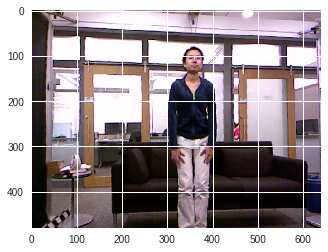

In [0]:
img = plt.imread('a16_s10_e02_rgb_frame1.jpg')
plt.imshow(img)